# Exploration of the Dynamic Solow Model

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [3]:
from solowModel import SolowModel

In [132]:
from ornstein_uhlenbeck import OrnsteinUhlenbeck

### Setting initial Parameters

In [113]:
# Separate parameters
np.random.seed(42)
t0 = 1
t_end = 1e4

In [101]:
# Characteristic timescales tau_h << tau_s << tau_y << 1/epsilon
tau_h = 1 / 0.04
tau_s = 1 / 0.004
tau_y = 1 / 0.0005
tech_rate = 0.00005
pop_growth = np.log(1.005) / 365 # USA is about 0.5% per year

In [102]:
# Household
hh_kwargs = {'savings_rate': 0.3, 'static': True}

In [103]:
# Firms
firm_kwargs = {'prod_func': 'cobb-douglas', 'parameters': {'rho': 1 / 3, 'tau_y': tau_y}}

In [104]:
# Capital Markets
capital_kwargs = {
    'static': False, 'depreciation': 0.2, 'pop_growth': pop_growth,
    'dynamic_kwargs': {
        'tau_s': tau_s, 'beta1': 1.1, 'beta2': 1.0, 
        'tau_h': tau_h, 'gamma': 2000, 
        'c1': 1, 'c2': 0.00015, 'c3': 0,
        }
    }   

In [146]:
# News Process
ou_kwargs = {'decay': 0.2, 'drift': 0, 'diffusion': 2.5, 't0': t0}

### Set up the Basic Solow Model (No dynamics)

In [162]:
#[production, capital supply, capital demand, sentiment, information, tech]
initial_values = [1, 1, 2, 0, 0, 1]

sm = SolowModel(hh_kwargs=hh_kwargs,
                   firm_kwargs=firm_kwargs,
                   capital_kwargs=capital_kwargs,
                   tech_rate=tech_rate,
                   ou_kwargs=ou_kwargs)

path = sm.solve(initial_values,t0=t0,t_end=t_end)

In [131]:
sm.ou_process.history

[0,
 0.0,
 -1.4791184962893789,
 -2.607449625513029,
 -7.4353266203163395,
 -10.913705882280476,
 -14.250693847705532,
 -15.494831560878854,
 -22.78108886785018,
 -28.47482850572306,
 -31.452749131695445,
 -38.856007172092696,
 -51.91611214180793,
 -59.101395126799034,
 -69.08443179581302,
 -80.72782521727865,
 -101.23284937759787,
 -117.69827993849941,
 -143.1711261389773,
 -173.07894872732334,
 -209.45168138776802,
 -248.97467471043362,
 -299.2191055337836,
 -357.85857405907126,
 -429.2405363136746,
 -515.3262485856419,
 -620.7584584621358,
 -740.3797986862935,
 -892.1142424948152,
 -1069.5064560586916,
 -1282.4661057901617,
 -1536.073436232813,
 -1839.8178983984274,
 -2208.1249495766547,
 -2648.4239537271737,
 -3173.696560196477,
 -3808.598814153078,
 -4572.984660671356,
 -5488.5427630873755,
 -6589.512930701387,
 -7906.485974814177,
 -9485.122029256661,
 -11382.449038838164,
 -13662.99124672943,
 -16393.035368987672,
 -19676.08319018912,
 -23615.164715171755,
 -28338.643504174845,


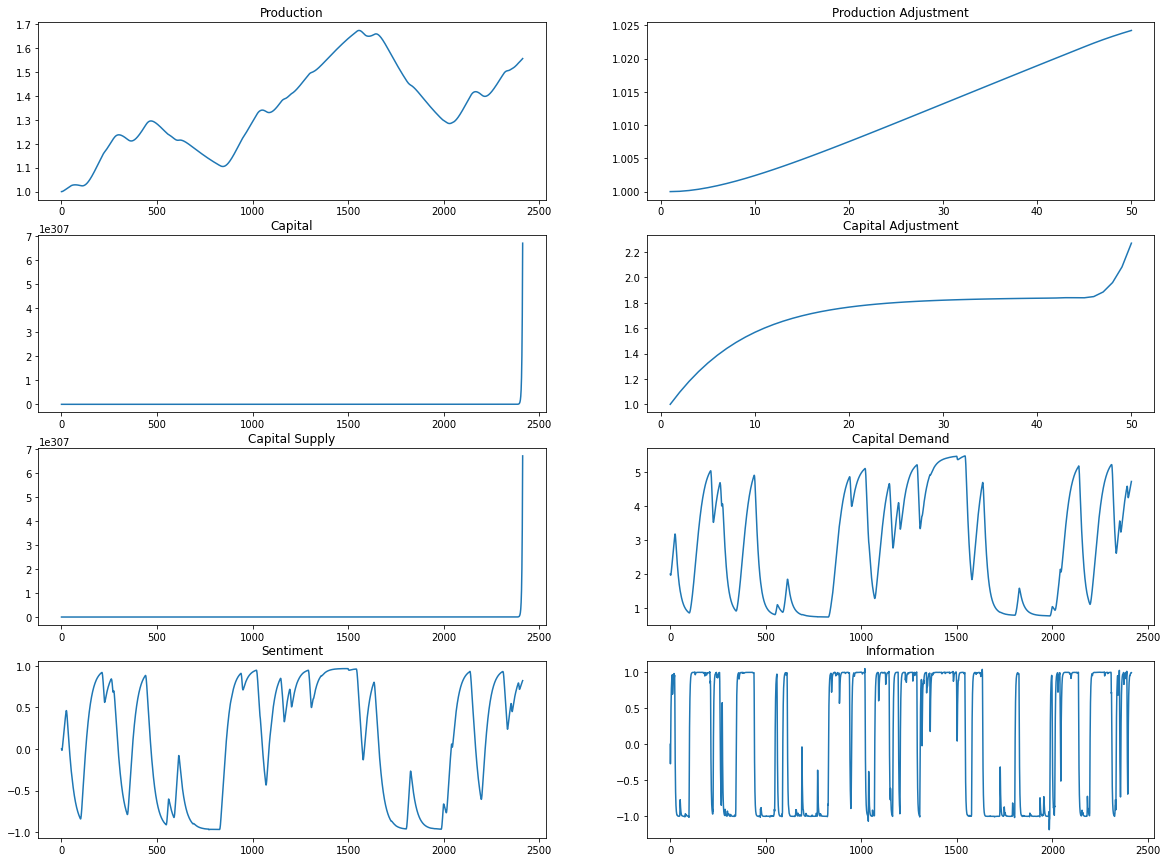

In [163]:
adj_period = 50

fig,ax_lst = plt.subplots(4,2)
fig.set_size_inches(20,15)
#Production and Tech
ax_lst[0,0].plot(path.t,path.y[0,:])
ax_lst[0,0].set_title('Production')
ax_lst[0,1].plot(path.t[:adj_period],path.y[0,:adj_period])
ax_lst[0,1].set_title('Production Adjustment')
# Capital
ax_lst[1,0].plot(path.t,path.y[1,:])
ax_lst[1,0].set_title('Capital')
ax_lst[1,1].plot(path.t[:adj_period],path.y[1,:adj_period])
ax_lst[1,1].set_title('Capital Adjustment')
# Capital Market
ax_lst[2,0].plot(path.t,path.y[1,:])
ax_lst[2,0].set_title('Capital Supply')
ax_lst[2,1].plot(path.t,path.y[2,:])
ax_lst[2,1].set_title('Capital Demand')
# Capital Demand
ax_lst[3,0].plot(path.t,path.y[3,:])
ax_lst[3,0].set_title('Sentiment')
ax_lst[3,1].plot(path.t,path.y[4,:])
ax_lst[3,1].set_title('Information')
plt.show()

In [147]:
test = OrnsteinUhlenbeck(**ou_kwargs)
for t in np.linspace(1,11,51):
    print(t)
    n = test.euler_maruyama(t)

1.0
i:	 1
delta:	 0.0
bxt:	 0.0
diff_term:	 0.0
news:	 0.0
1.2
i:	 1
delta:	 0.19999999999999996
bxt:	 0.0
diff_term:	 -0.7924901784923061
news:	 -0.7924901784923061
1.4
i:	 1
delta:	 0.19999999999999996
bxt:	 0.15849803569846121
diff_term:	 0.9910914058252681
news:	 0.23030083447265426
1.6
i:	 1
delta:	 0.20000000000000018
bxt:	 -0.04606016689453085
diff_term:	 0.17685453040662502
news:	 0.3979433315003731
1.8
i:	 1
delta:	 0.19999999999999996
bxt:	 -0.07958866630007462
diff_term:	 0.42666216204048046
news:	 0.8086877602808387
2.0
i:	 1
delta:	 0.19999999999999996
bxt:	 -0.16173755205616774
diff_term:	 1.6105339127042344
news:	 2.3868741625738394
2.2
i:	 1
delta:	 0.20000000000000018
bxt:	 -0.4773748325147679
diff_term:	 0.39865388839261223
news:	 2.6900530844634982
2.4000000000000004
i:	 1
delta:	 0.20000000000000018
bxt:	 -0.5380106168926997
diff_term:	 0.07984087987696233
news:	 2.6622918409619203
2.6
i:	 1
delta:	 0.19999999999999973
bxt:	 -0.5324583681923841
diff_term:	 -0.092336